In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [2]:
frame = cv2.imread('Video/1/478.png')[:,:1650,:]

In [3]:
def show(frame):
    cv2.imshow('image',frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
blur = cv2.blur(frame, (2, 2))

In [5]:
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

In [6]:
mask = cv2.inRange(hsv, np.array([104, 131, 0], dtype='int'), np.array([167, 255, 255], dtype='int'))

In [7]:
inv = np.invert(mask)

In [8]:
show(cv2.bitwise_and(frame, frame, mask=mask))

In [9]:
ellipseA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(inv, cv2.MORPH_OPEN, ellipseA, iterations=3)

In [10]:
skin = cv2.bitwise_and(frame, frame, mask=opening)
skin_not = cv2.bitwise_and(frame, frame, mask=np.invert(opening))

In [11]:
def y_finger(mask):
    return np.argmax(mask.any(axis=1))

def x_finger(mask):
    return np.argmax(mask[y_finger(mask)])

In [12]:
show(inv)
show(opening)

In [13]:
def mask_rectangle(x,y):
    mask = np.zeros((1080, 1650), np.uint8)
    mask[x-50:x+130, y-200:y+200] = 255
    return mask

In [14]:
mask_r = mask_rectangle(y_finger(opening),x_finger(opening))

In [15]:
mask_fingertips = cv2.bitwise_and(inv, mask_r)

In [16]:
ellipseB = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
final_mask = cv2.morphologyEx(mask_fingertips, cv2.MORPH_OPEN, ellipseB, iterations=2)
final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_DILATE, ellipseB, iterations=2)

final_frame = frame.astype(np.float)
final_frame[final_mask == 0] *= 0.5
final_frame = final_frame.astype(np.uint8)
show(final_frame)

In [17]:
ellipseB = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_fingertips_hist = cv2.morphologyEx(mask_fingertips, cv2.MORPH_OPEN, ellipseB, iterations=2)
show(cv2.bitwise_and(frame, frame, mask=mask_fingertips_hist))

In [18]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [19]:
import csv 
import sys

import numpy as np
import pandas as pd

from scipy import interpolate, stats
import  struct, time, datetime, os, glob, errno, threading, logging
import numpy as np
%matplotlib inline

#seaborns
plt.style.use(['seaborn-white', 'seaborn-paper'])
#calling rc is equivalent to setting rcParams
width = 3.5
# dpi = 100.0
# plt.rc('figure', figsize=(1920 / dpi, 1080 / dpi), dpi=dpi)
plt.rc('figure', figsize=(6, 3), dpi=600)
plt.rc('font', family='serif', serif='DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=5, frameon=True)
plt.rc('axes', labelsize=8, titlesize=8)

In [20]:
hist_h = cv2.calcHist([hsv], [0], mask_fingertips_hist, [36], [0,180])

In [21]:
hist_h.T[0]

array([  1.30800000e+03,   2.10000000e+02,   4.50000000e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
         1.75000000e+02,   3.09000000e+02,   5.81000000e+02,
         5.38000000e+02,   5.26000000e+02,   4.20000000e+02,
         4.44000000e+02,   4.00000000e+02,   3.91000000e+02,
         3.92000000e+02,   6.99000000e+02,   1.11700000e+03,
         1.49500000e+03,   1.85400000e+03,   2.34300000e+03], dtype=float32)

SystemError: <built-in method write of _io.BufferedWriter object at 0x7fee34f05eb8> returned a result with an error set

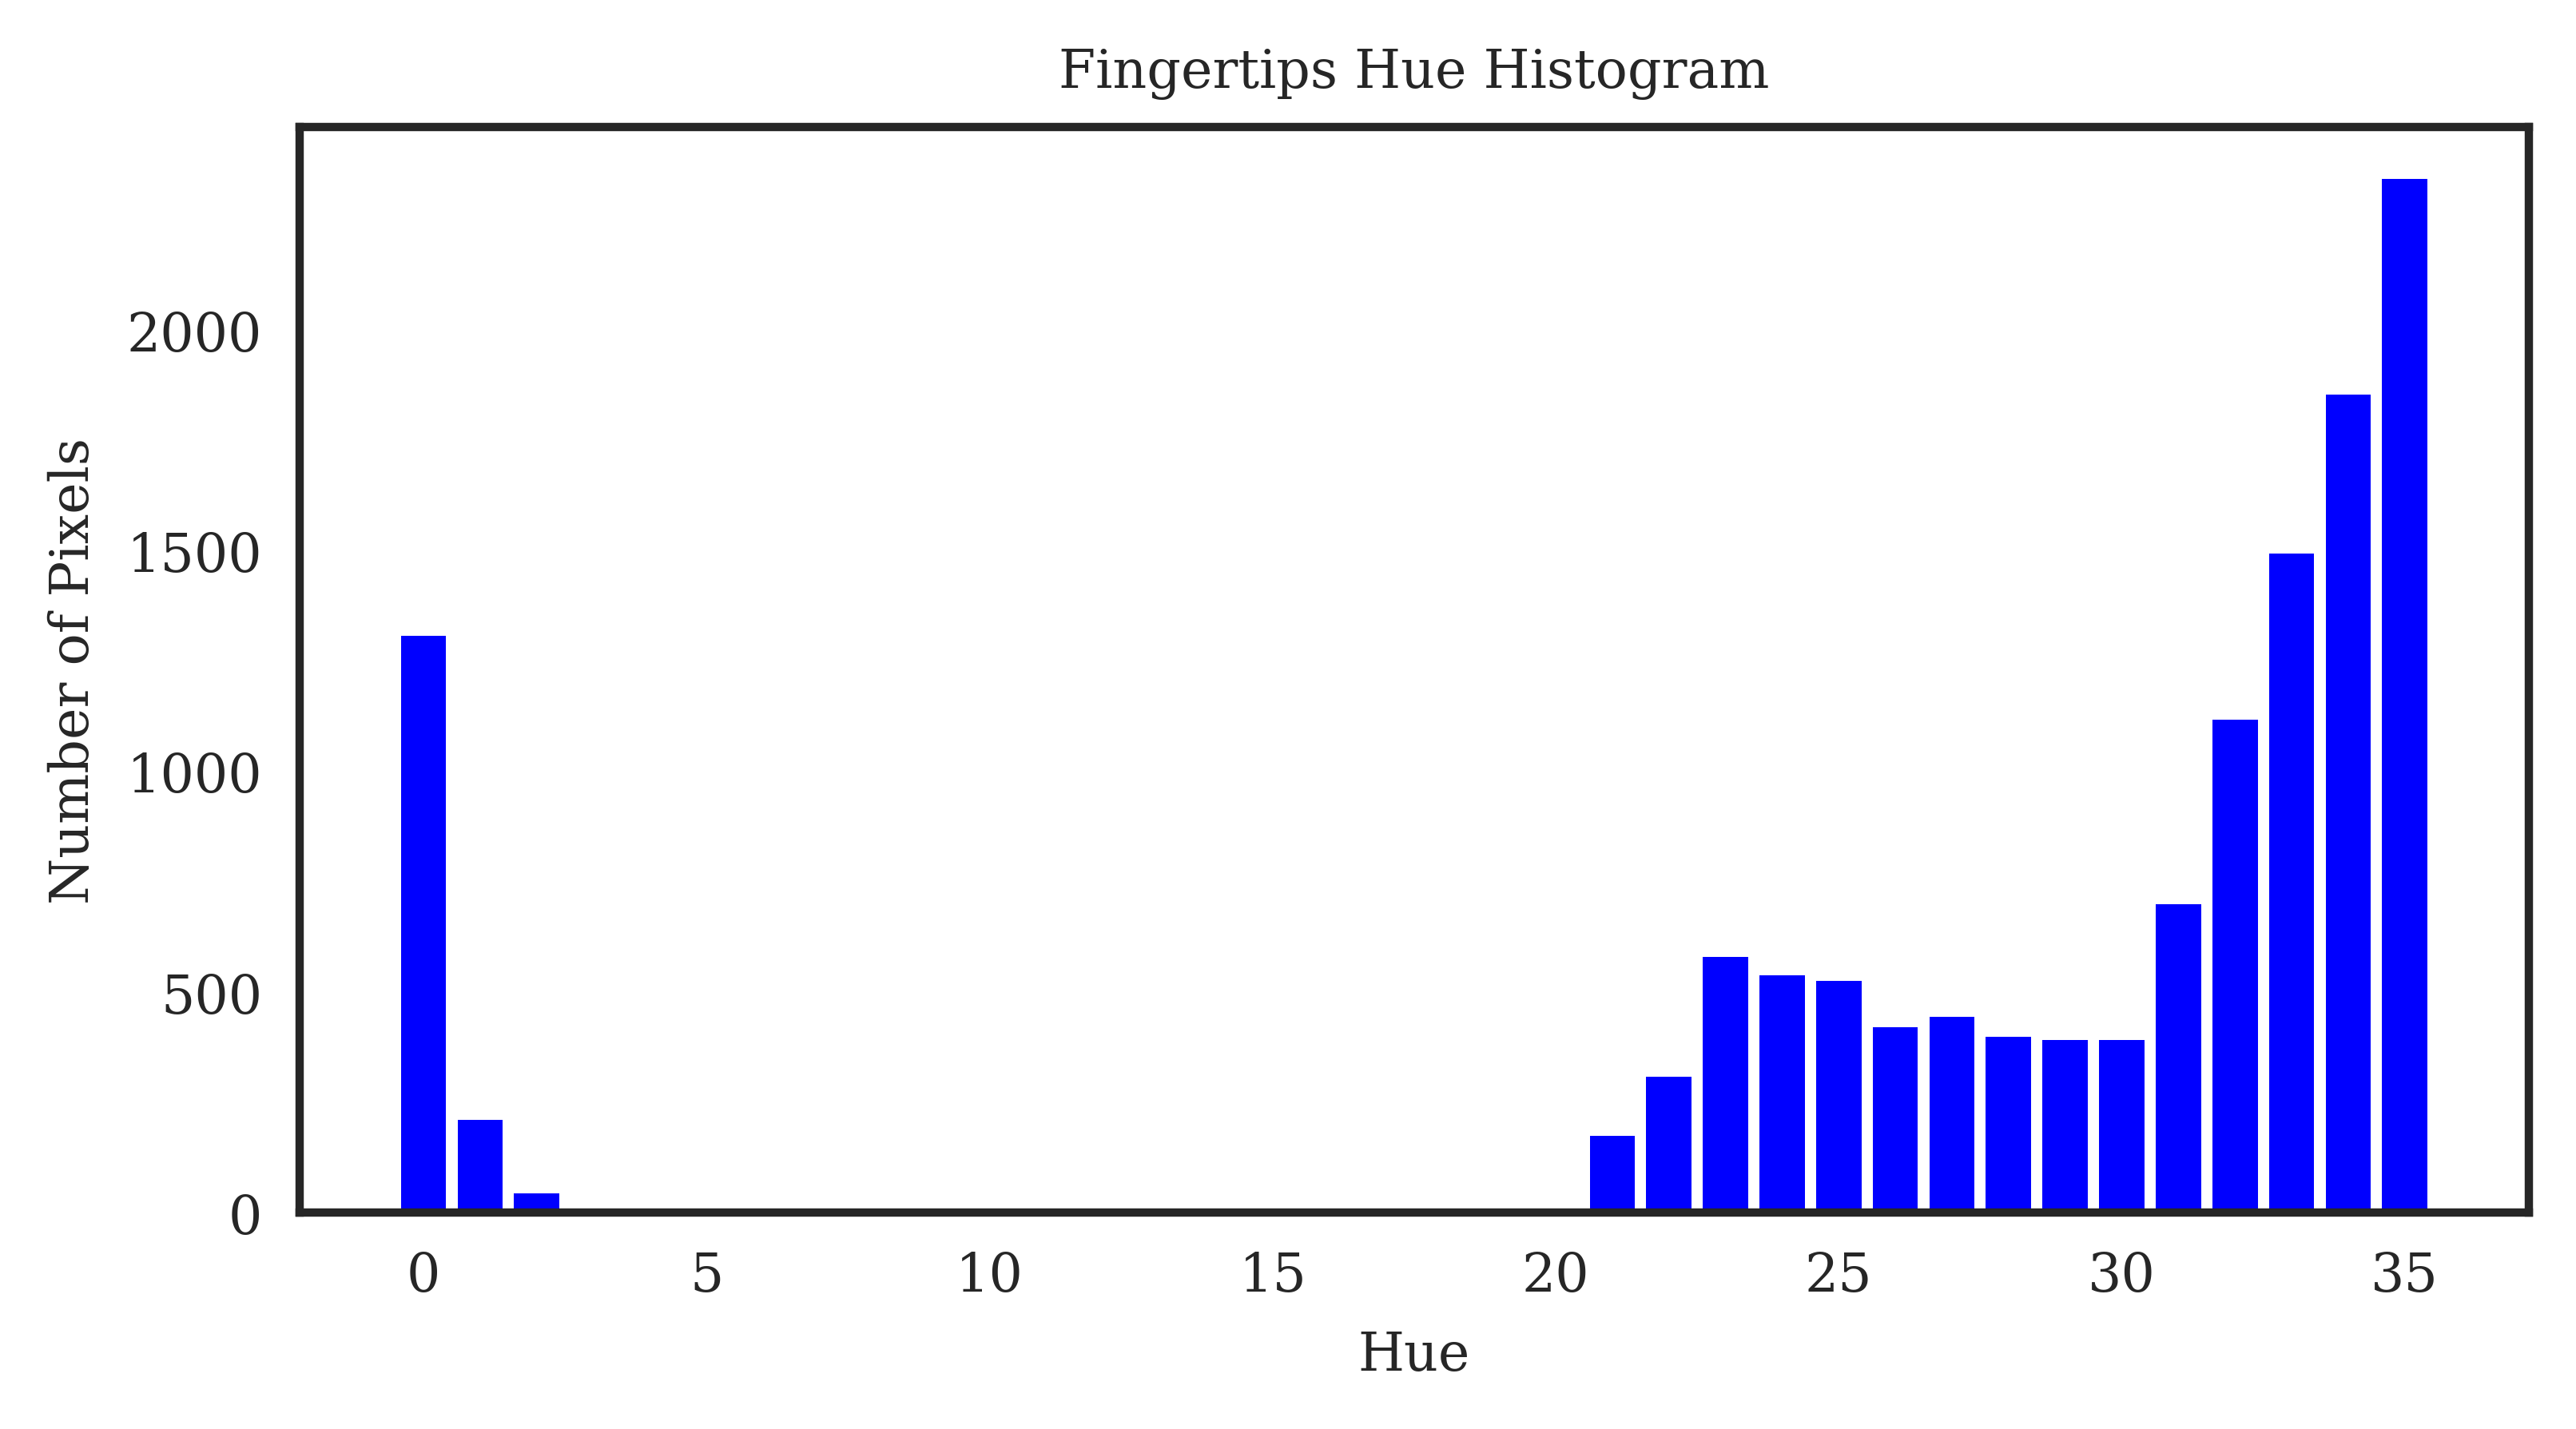

In [24]:
for i in range(478,1895):
    plt.grid()
    plt.bar(np.arange(36), hist_h.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Hue Histogram")
    plt.xlabel('Hue')
    plt.ylabel('Number of Pixels')
    plt.savefig('hhist/' + str(i) + '.png')
    #plt.show()

In [ ]:
f = hsv.astype('float')
f[opening == 0 , 2] *= 0.1
f[opening == 0 , 1] *= 0.1
f = f.astype(np.uint8)

In [ ]:
show(frame)

In [ ]:
show(f)

In [ ]:
(f.astype(np.uint8) == frame).all()

In [ ]:
a = np.ones((10, 3))
a[0]=0
print (a[:, 1])
a[a[:, 1] == 0, 1] += 10
print (a)

In [ ]:
a[m == 0,2] *= 0.2


In [ ]:
final_frame = frame.astype(np.float)
final_frame[final_mask == 0] *= 0.5
final_frame = final_frame.astype(np.uint8)
show(final_frame)

In [22]:
def select_fingers(frame):
    frame = frame[:,:1650,:]
    blur = cv2.blur(frame, (2, 2))
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, np.array([104, 131, 0], dtype='int'), np.array([167, 255, 255], dtype='int'))
    inv = np.invert(mask)
    ellipseA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    opening = cv2.morphologyEx(inv, cv2.MORPH_OPEN, ellipseA, iterations=3)
    skin = cv2.bitwise_and(frame, frame, mask=opening)
    skin_not = cv2.bitwise_and(frame, frame, mask=np.invert(opening))
    mask_r = mask_rectangle(y_finger(opening),x_finger(opening))
    mask_fingertips = cv2.bitwise_and(inv, mask_r)
    ellipseB = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    final_mask = cv2.morphologyEx(mask_fingertips, cv2.MORPH_OPEN, ellipseB, iterations=2)
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_DILATE, ellipseB, iterations=2)
    final_frame = frame.astype(np.float)
    final_frame[final_mask == 0] *= 0.5
    final_frame = final_frame.astype(np.uint8)
    
    return final_frame

In [23]:
for i in range (478,1979):
    frame = cv2.imread('Video/1/' + str(i) + '.png')
    processed_frame = select_fingers(frame)
    cv2.imwrite('Video/2/' + str(i - 478) + '.png', processed_frame)

KeyboardInterrupt: 

In [24]:
def produce_histograms(frame):
    frame = frame[:,:1650,:]
    blur = cv2.blur(frame, (2, 2))
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, np.array([104, 131, 0], dtype='int'), np.array([167, 255, 255], dtype='int'))
    inv = np.invert(mask)
    ellipseA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    opening = cv2.morphologyEx(inv, cv2.MORPH_OPEN, ellipseA, iterations=3)
    skin = cv2.bitwise_and(frame, frame, mask=opening)
    skin_not = cv2.bitwise_and(frame, frame, mask=np.invert(opening))
    mask_r = mask_rectangle(y_finger(opening),x_finger(opening))
    mask_fingertips = cv2.bitwise_and(inv, mask_r)
    ellipseB = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask_fingertips_hist = cv2.morphologyEx(mask_fingertips, cv2.MORPH_OPEN, ellipseB, iterations=2)
    hist_h = cv2.calcHist([hsv], [0], mask_fingertips_hist, [36], [0,180])
    hist_s = cv2.calcHist([hsv], [1], mask_fingertips_hist, [32], [0,256])
    hist_v = cv2.calcHist([hsv], [2], mask_fingertips_hist, [32], [0,256])
    return hist_h, hist_s, hist_v

In [26]:
h = []
s = []
v = []
for i in range (478,1979):
    frame = cv2.imread('Video/1/' + str(i) + '.png')
    hist_h, hist_s, hist_v = produce_histograms(frame)
    
    h.append(hist_h)
    s.append(hist_s)
    v.append(hist_v)

In [ ]:
k = 1
for i in range (len(h)):
    hist_h = h[i]
    hist_s = s[i]
    hist_v = v[i]
    
    plt.figure()
    plt.grid()
    plt.ylim(0,4800)
    plt.xlim(0 - k,36 + k)
    plt.bar(np.arange(36), hist_h.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Hue Histogram")
    plt.xlabel('Hue')
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/H/' + str(i) + '.png')
    
    plt.figure()
    plt.grid()
    plt.ylim(0,2500)
    plt.xlim(0 - k,32 + k)
    plt.bar(np.arange(32), hist_s.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Saturation Histogram")
    plt.xlabel('Saturation')
    plt.ylim()
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/S/' + str(i) + '.png')
    
    plt.figure()
    plt.grid()
    plt.ylim(0,2300)
    plt.xlim(0 - k,32 + k)
    plt.bar(np.arange(32), hist_v.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Value Histogram")
    plt.xlabel('Value')
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/V/' + str(i) + '.png')

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [32]:
np.max(h), np.max(s), np.max(v)

(4764.0, 2474.0, 2237.0)

In [ ]:
k = 1
for i in range (478,1979):
    frame = cv2.imread('Video/1/' + str(i) + '.png')
    hist_h, hist_s, hist_v = produce_histograms(frame)
    
    plt.figure()
    plt.grid()
    plt.ylim(0,4800)
    plt.xlim(0 - k,36 + k)
    plt.bar(np.arange(36), hist_h.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Hue Histogram")
    plt.xlabel('Hue')
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/H/' + str(i - 478) + '.png')
    
    plt.figure()
    plt.grid()
    plt.ylim(0,2500)
    plt.xlim(0 - k,32 + k)
    plt.bar(np.arange(32), hist_s.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Saturation Histogram")
    plt.xlabel('Saturation')
    plt.ylim()
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/S/' + str(i - 478) + '.png')
    
    plt.figure()
    plt.grid()
    plt.ylim(0,2300)
    plt.xlim(0 - k,32 + k)
    plt.bar(np.arange(32), hist_v.T[0], align='center', alpha=1, facecolor='blue')
    plt.title("Fingertips Value Histogram")
    plt.xlabel('Value')
    plt.ylabel('Number of Pixels')
    plt.savefig('Video/V/' + str(i - 478) + '.png')

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
